In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [26]:
# Création d'un dataset réaliste : Comportement clients e-commerce
np.random.seed(42)
n_clients = 500
 
# Génération de données corrélées de manière réaliste
age = np.random.normal(35, 12, n_clients)
age = np.clip(age, 18, 70)  # Limiter l'âge entre 18 et 70
 
# Le revenu augmente généralement avec l'âge (corrélation positive modérée)
revenu = 25000 + (age - 18) * 800 + np.random.normal(0, 8000, n_clients)
revenu = np.clip(revenu, 20000, 120000)
 
# Le temps passé sur le site dépend de l'âge (les plus jeunes passent plus de temps)
temps_site = 45 - (age - 35) * 0.5 + np.random.normal(0, 10, n_clients)
temps_site = np.clip(temps_site, 5, 120)
 
# Le montant des achats dépend du revenu (corrélation forte positive)
montant_achats = revenu * 0.015 + np.random.normal(0, 150, n_clients)
montant_achats = np.clip(montant_achats, 50, 2500)
 
# Le nombre de visites est corrélé au temps passé
nb_visites = temps_site * 0.3 + np.random.normal(0, 3, n_clients)
nb_visites = np.clip(nb_visites, 1, 50)
 
# Le taux de conversion dépend du temps passé et du montant
taux_conversion = 0.05 + (temps_site / 1000) + (montant_achats / 50000) + np.random.normal(0, 0.02, n_clients)
taux_conversion = np.clip(taux_conversion, 0, 0.3)
 
# Score de satisfaction (légèrement corrélé au montant et au temps)
satisfaction = 3.5 + (montant_achats / 1000) * 0.3 + (temps_site / 100) * 0.2 + np.random.normal(0, 0.5, n_clients)
satisfaction = np.clip(satisfaction, 1, 5)
 
# Création du DataFrame
df_clients = pd.DataFrame({
    'age': age.round(0),
    'revenu_annuel': revenu.round(0),
    'temps_site_min': temps_site.round(1),
    'montant_achats_euros': montant_achats.round(2),
    'nb_visites_mois': nb_visites.round(0),
    'taux_conversion': taux_conversion.round(3),
    'score_satisfaction': satisfaction.round(1)
})
 
df_clients.head(10)

,age,revenu_annuel,temps_site_min,montant_achats_euros,nb_visites_mois,taux_conversion,score_satisfaction
0,41.0,50778.0,56.0,878.42,15.0,0.135,2.9
1,33.0,52548.0,55.1,705.54,16.0,0.139,3.4
2,43.0,33629.0,41.7,381.71,10.0,0.093,3.5
3,53.0,57725.0,29.4,865.37,8.0,0.084,4.8
4,32.0,31147.0,53.4,441.68,10.0,0.091,4.0
5,32.0,32455.0,50.3,418.85,16.0,0.092,3.1
6,54.0,49021.0,44.5,839.78,13.0,0.170,4.1
7,44.0,39055.0,46.7,729.13,12.0,0.136,3.0
8,29.0,34481.0,58.3,530.48,19.0,0.092,4.3
9,42.0,37161.0,36.4,779.04,14.0,0.076,3.6


## Préparation des données pour l'ACP

In [27]:
# Objectifs : Distribution centrée réduite des données

scaler = StandardScaler()

df_normalize = pd.DataFrame(
    scaler.fit_transform(df_clients),
    columns=df_clients.columns
)

df_normalize.head()

,age,revenu_annuel,temps_site_min,montant_achats_euros,nb_visites_mois,taux_conversion,score_satisfaction
0,0.508116,1.040508,0.855852,1.271206,0.283646,1.146041,-1.652476
1,-0.211340,1.201481,0.779544,0.493329,0.507341,1.317707,-0.690616
2,0.687980,-0.519116,-0.356595,-0.963751,-0.834831,-0.656450,-0.498244
3,1.587300,1.672306,-1.399470,1.212487,-1.282222,-1.042698,2.002593
4,-0.301272,-0.744843,0.635407,-0.693914,-0.834831,-0.742283,0.463617


In [28]:
pca = PCA() # Par défaut toutes les composantes
composantes = pca.fit_transform(df_normalize)

print(f"Nombre de variables originales : {df_normalize.shape[1]}")
print(f"Nombre de composantes principales : {composantes.shape[1]}")

Nombre de variables originales : 7
Nombre de composantes principales : 7


## Interprétation : Variance expliquée

La variance expliquée indique le pourcentage d'"information" chaque composante capture.

In [29]:
variance_expliquee = pca.explained_variance_ratio_
variance_cumulee = np.cumsum(variance_expliquee)

df_variance = pd.DataFrame({
    "Composante" : [f"PC{i+1}" for i in range(len(variance_expliquee))],
    "Variance expliquée (%)" : (variance_expliquee * 100).round(2),
    "Variance cumulée (%)" : (variance_cumulee * 100).round(2),
})

df_variance.head()

,Composante,Variance expliquée (%),Variance cumulée (%)
0,PC1,43.44,43.44
1,PC2,22.56,66.00
2,PC3,14.15,80.16
3,PC4,8.89,89.04
4,PC5,5.32,94.37


## Interprétation :

- PC1 capture 43.44 % de la variance total
- PC1 + PC2 capture 66 % de la variance total
- PC1 + PC2 + PC3 capture 80.16% de la variance total

## Visualisation

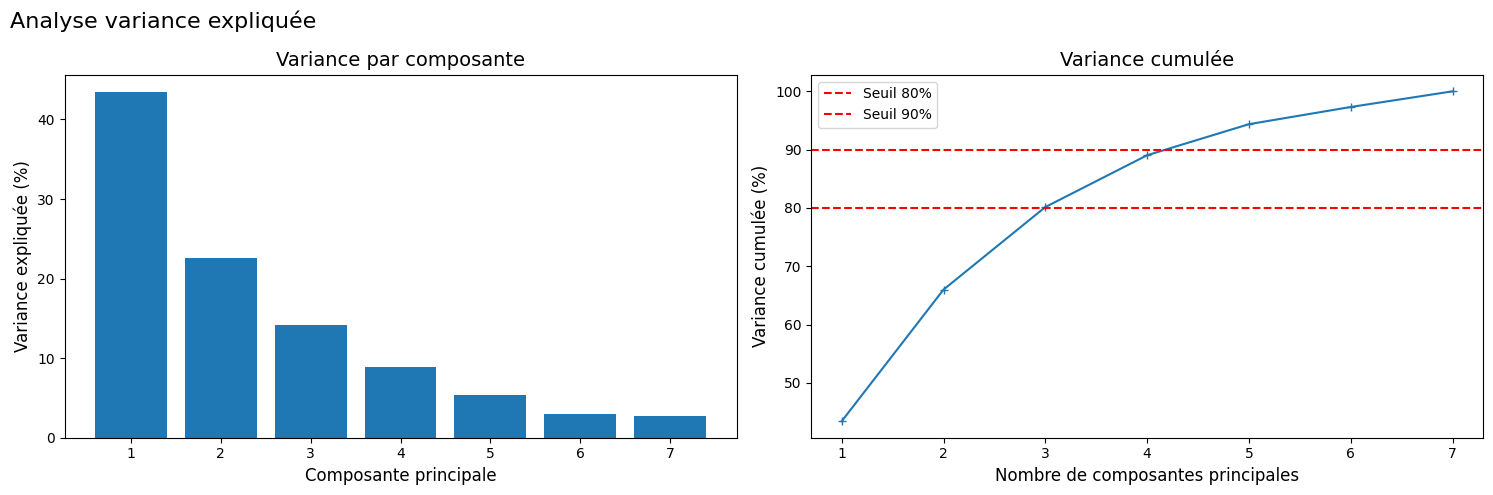

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
plt.suptitle("Analyse variance expliquée", fontsize=16, x=0.11)

axes[0].bar(range(1, len(variance_expliquee) + 1), variance_expliquee * 100)
axes[0].set_xlabel("Composante principale", fontsize=12)
axes[0].set_ylabel("Variance expliquée (%)", fontsize=12)
axes[0].set_title("Variance par composante", fontsize=14)

axes[1].plot(range(1, len(variance_cumulee) + 1), variance_cumulee * 100, marker="+")
axes[1].axhline(y=80, color="r", linestyle="--", label="Seuil 80%")
axes[1].axhline(y=90, color="r", linestyle="--", label="Seuil 90%")
axes[1].set_xlabel("Nombre de composantes principales", fontsize=12)
axes[1].set_ylabel("Variance cumulée (%)", fontsize=12)
axes[1].set_title("Variance cumulée", fontsize=14)

plt.legend()
plt.tight_layout()

## Règle pratique

- On garde généralement les composantes qui expliquent 80% à 90 % de la variance
- Ici, on pourrait passer de 7 variables à 3 composantes

## Les loading : Contribution des variables

Les loadings montrent comment chaque variable originale contribue à chaque composante principale.

In [31]:
# Extraction des loadings
loadings = pca.components_

df_loadings = pd.DataFrame(
    loadings[:3].T, # Variables mises en ligne
    columns=["PC1", "PC2", "PC3"],
    index=df_clients.columns,
)

df_loadings.head(10)

,PC1,PC2,PC3
age,0.485681,0.152349,-0.081912
revenu_annuel,0.454362,0.377776,-0.038710
temps_site_min,-0.441974,0.398528,0.037099
montant_achats_euros,0.413590,0.413926,-0.013270
nb_visites_mois,-0.397478,0.390180,0.088984
taux_conversion,-0.157549,0.588061,-0.156146
score_satisfaction,0.091980,0.076542,0.978744


## Interprétation

Similaire à l'interprétation du r².
- +1 ou -1 => Forte corrélation
- 0 => Pas de corrélation
- Signe indique le sens de la corrélation

## Visualisation

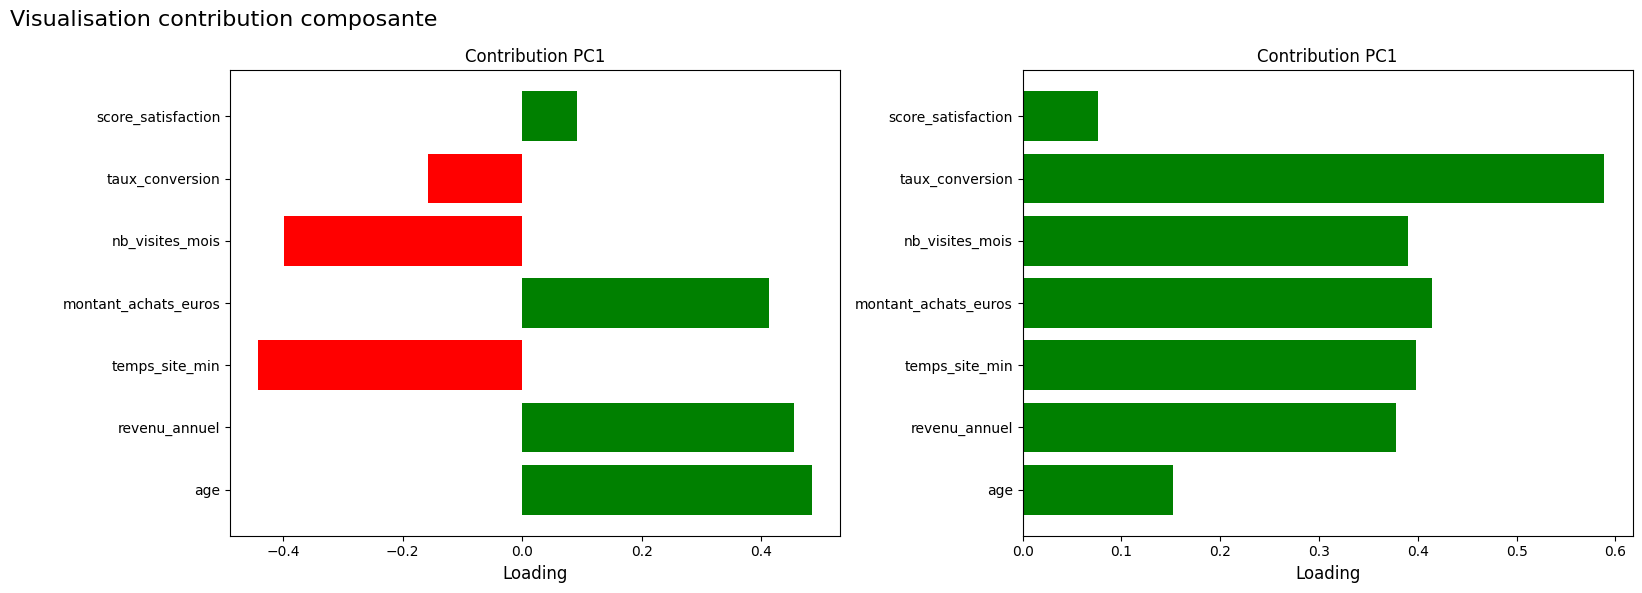

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plt.suptitle("Visualisation contribution composante", fontsize=16, x=0.11)

# PC1 
colors_pc1 = ["red" if x < 0 else "green" for x in df_loadings["PC1"]]
axes[0].barh(df_loadings.index, df_loadings["PC1"], color=colors_pc1)
axes[0].set_xlabel("Loading", fontsize=12)
axes[0].set_title("Contribution PC1")

# PC2 
colors_pc2 = ["red" if x < 0 else "green" for x in df_loadings["PC2"]]
axes[1].barh(df_loadings.index, df_loadings["PC2"], color=colors_pc2)
axes[1].set_xlabel("Loading", fontsize=12)
axes[1].set_title("Contribution PC1")

plt.tight_layout()

## Visualisation 2D

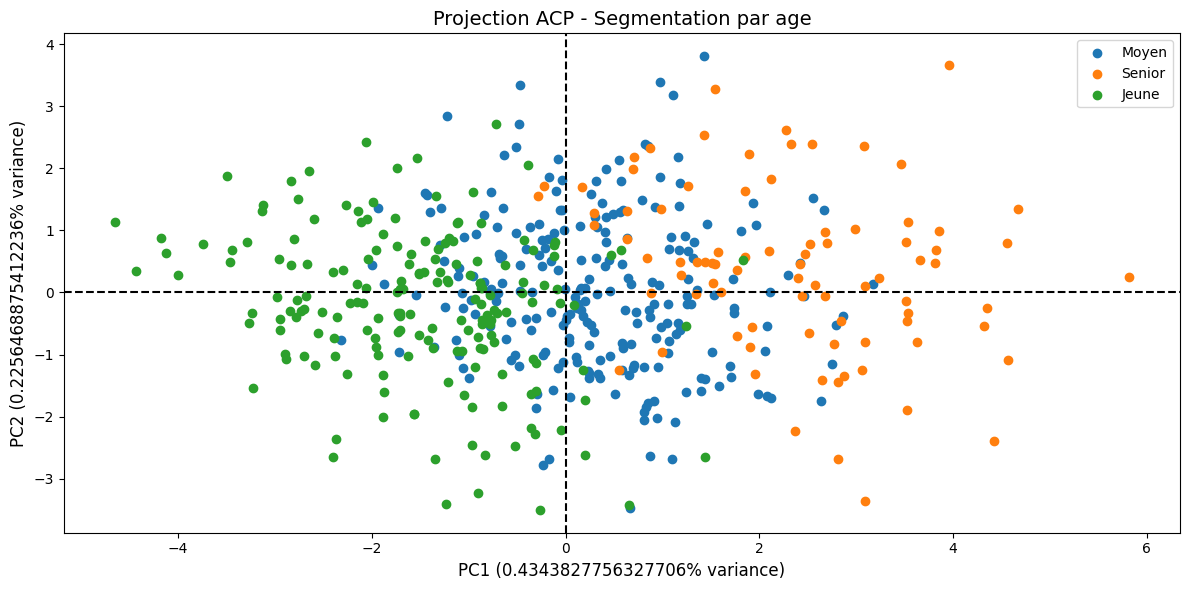

In [39]:
df_pca = pd.DataFrame(
    composantes[:,:2],
    columns=["PC1", "PC2"],
)

df_pca["segment_age"] = pd.cut(df_clients["age"], bins=[0, 30, 45, 100], labels=["Jeune", "Moyen", "Senior"])

plt.figure(figsize=(12, 6))

# sns.scatterplot(df_pca, x="PC1", y="PC2", hue="segment_age")

for segment in df_pca["segment_age"].unique():
    mask = df_pca["segment_age"] == segment
    plt.scatter(df_pca.loc[mask, "PC1"], df_pca.loc[mask, "PC2"], label=segment)

plt.xlabel(f"PC1 ({variance_expliquee[0]}% variance)", fontsize=12)
plt.ylabel(f"PC2 ({variance_expliquee[1]}% variance)", fontsize=12)
plt.title("Projection ACP - Segmentation par age", fontsize=14)

plt.axhline(y=0, color="k", linestyle="--")
plt.axvline(x=0, color="k", linestyle="--")

plt.legend()
plt.tight_layout()

## Biplot : variables et observations ensemble

In [ ]:
plt.figure(figsize=(12, 8))

plt.scatter(composantes[:, 0], composantes[:, 1], alpha=0.3, c="gray")

scale_factor = 3 # pour rendre la flèche visible
for i, label in enumerate(df_clients.columns):
    plt.arrow(0,0,
              loadings[0, i] * scale_factor,
              loadings[1, i] * scale_factor,
              fc="red", ec="red", head_length=0.1, head_width=0.1)
    plt.text(loadings[0, i] * scale_factor * 1.15,
              loadings[1, i] * scale_factor * 1.15, label, ha="center", va="center")
    
plt.xlabel("PC1", fontsize=12)
plt.ylabel("PC2", fontsize=12)
plt.title("Observations et variables")
plt.axhline(y=0, color="k", linestyle="--")
plt.axvline(x=0, color="k", linestyle="--")
plt.tight_layout()
plt.show()

## Interprétation

- Flêches = Variables globales
- Direction flêches = Contribution PC1 ou PC2 (Les flêches proches de x=0 contribuent à PC1 et celles proches de y=0 contribuent à PC2)
- Longueur flêche = Importance de la variable

## Réduction de la dimension

In [43]:
n_composantes = 3

# Nouveau ACP avec seulement 3 composantes
pca_reduit = PCA(n_components=3)
df_reduit = pca_reduit.fit_transform(df_normalize)

df_reduit = pd.DataFrame(df_reduit, columns=[f"PC{i+1}" for i in range(n_composantes)])

df_reduit.head()

,PC1,PC2,PC3
0,0.421747,1.995889,-1.838078
1,-0.170023,1.856552,-0.843370
2,0.246702,-1.382235,-0.496136
3,3.508887,-0.142455,1.745980
4,-0.561164,-1.088040,0.581672


## Cas d'usage

- Ces 3 composantes peuvent maintenant être utilisées dans un modèle de ML
- Plus rapide à calculer, moins de risque d'apprentissage